# <b>OASIS INFOBYTE TASK 4<b><br>JANUARY 23 BATCH

***SPAM DETECTION MODEL***<br>***Building an email spam detector to recognize and classify emails into spam and non-spam.*** 

In [1]:
#Prepared by; Seghosime Joshua
#Email; vanjosh8@gmail.com
#phone; +2347032803248

In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import re
from textblob import TextBlob
from nltk.tokenize.toktok import ToktokTokenizer
import string
import nltk
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import spacy
#nlp = spacy.load('en_core_web_sm --user', disable=['ner'])
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading the dataset
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Science\Datasets\spam.csv', encoding="ISO-8859-1")

In [4]:
#check the dataset in a dataframe
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
#check the dataframe in a background style
df.head().style.background_gradient(cmap='jet')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",nan,nan,nan
1,ham,Ok lar... Joking wif u oni...,nan,nan,nan
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,nan,nan,nan
3,ham,U dun say so early hor... U c already then say...,nan,nan,nan
4,ham,"Nah I don't think he goes to usf, he lives around here though",nan,nan,nan


In [6]:
#check the total number of rows and columns
df.shape

(5572, 5)

In [7]:
#print the df columns
df.columns.tolist()

['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

In [8]:
#checking general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#let's how many data type is in the df
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

# <b>Data Cleaning and Preprocessing<b>

In [10]:
#checking for duplicates
df.duplicated().sum()

403

In [11]:
#removing duplicates
df.drop_duplicates(inplace=True)
print(df.shape)

(5169, 5)


In [12]:
#Check for null the values in the dataset
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

In [13]:
#removing unwanted columns with null values
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#Rename the columns to differentiate between messages and label
df.rename(columns={'v1':'label','v2':'messages'},inplace=True)
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#check the top 12 text
df.sample(13)

,label,messages
4918,ham,Re your call; You didn't see my facebook huh?
2951,ham,Tell me whos this pls:-)
2315,ham,That's significant but dont worry.
2122,ham,Do you know when the result.
1549,ham,Dude sux for snake. He got old and raiden got ...
139,ham,Got c... I lazy to type... I forgot Ì_ in lect...
781,ham,"Hmmm ... I thought we said 2 hours slave, not ..."
736,ham,Thanks for looking out for me. I really apprec...
20,ham,Is that seriously how you spell his name?
4575,spam,Congratulations ur awarded 500 of CD vouchers ...


In [16]:
#checking the unique values
df['label'].unique()

array(['ham', 'spam'], dtype=object)

# Exploratory Data Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

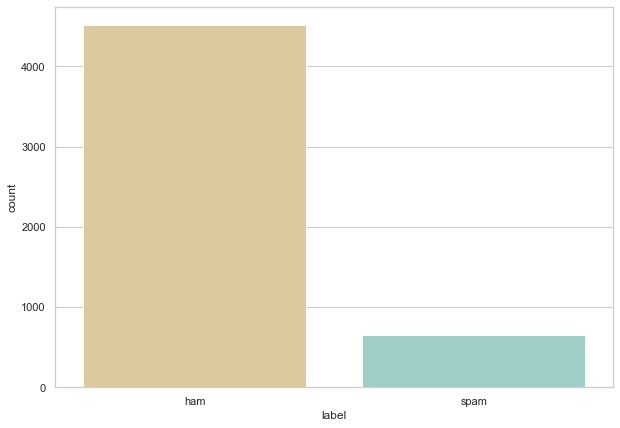

In [17]:
#value count analysis
#sns.countplot(x='label',data=df)
sns.set(rc={'figure.figsize':(10,7)})
sns.set_style('whitegrid')
sns.countplot(x='label',data=df,palette='BrBG')

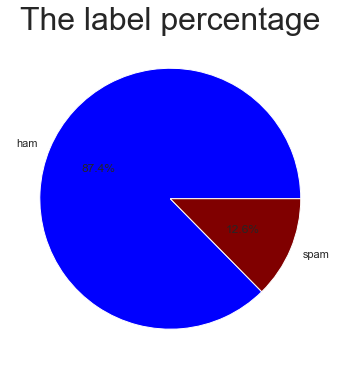

In [18]:
#visuaize the label percentage in the train dataset
label=df['label'].value_counts()
#to visualize the above information in the pie chart
plt.figure(figsize=(14,6))
plt.pie(label,labels=['ham','spam'],colors=['blue','maroon'],autopct='%1.1f%%')
#set the title name with fontsize 
plt.title("The label percentage",fontsize=32)
plt.show()

In [20]:
#isntalling wordcloud
#pip install wordcloud

(-0.5, 399.5, 199.5, -0.5)

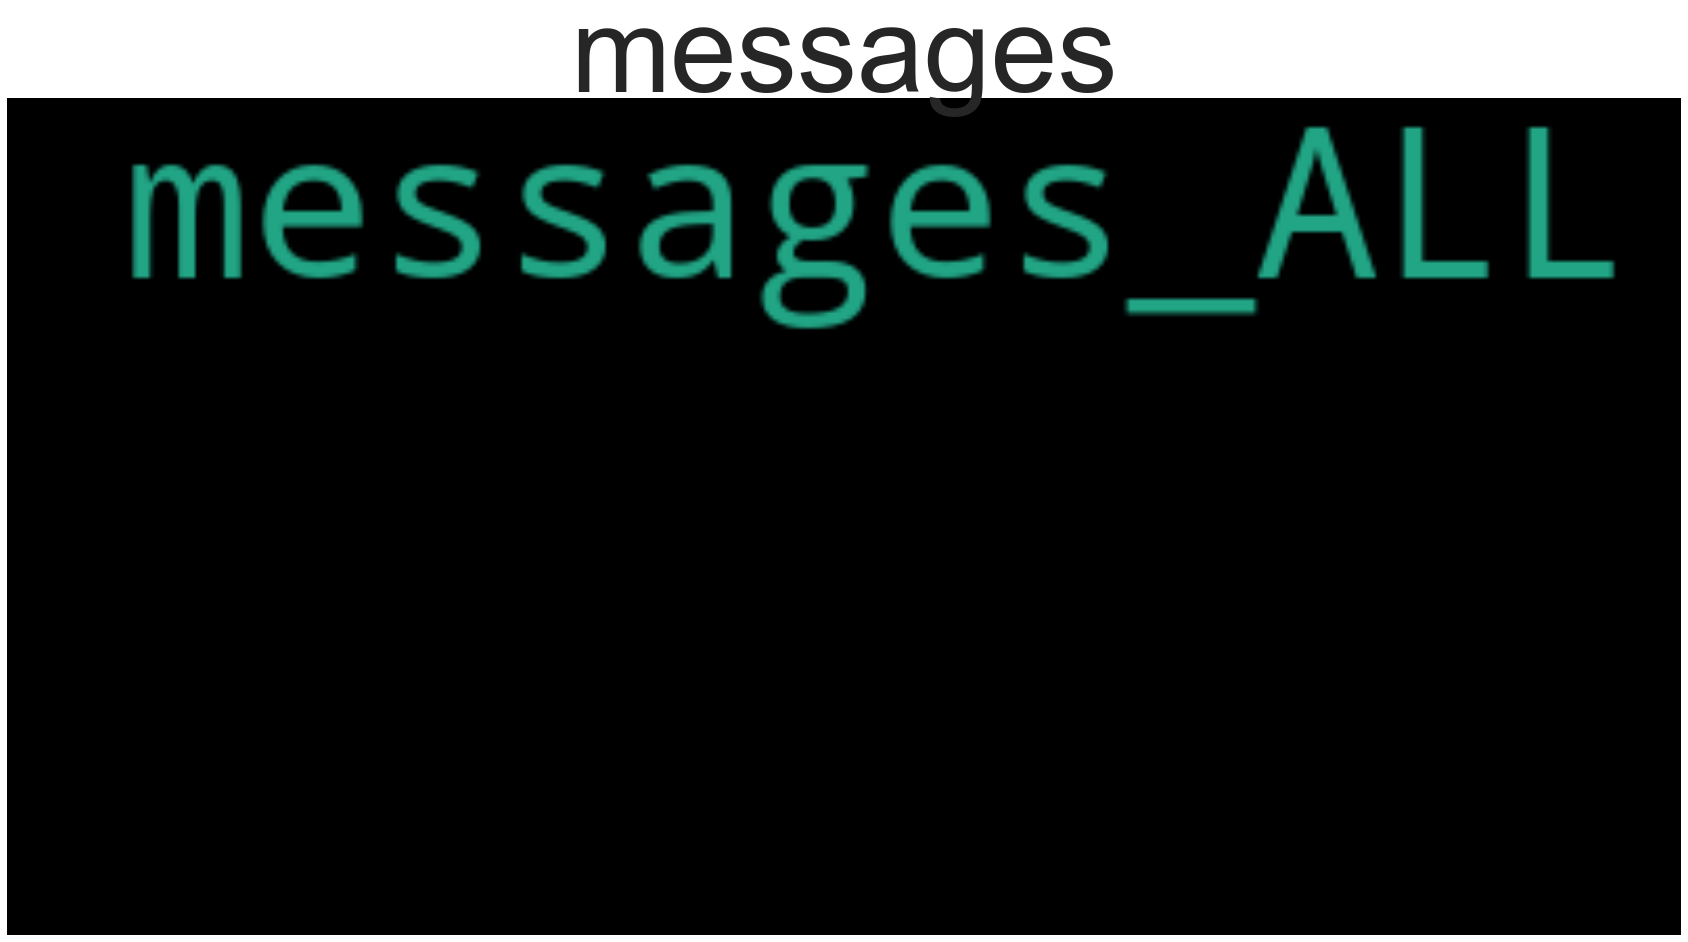

In [27]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
messages_All = " ".join(review for review in df['messages'])
fig = plt.subplots(1, figsize=(30,30))
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate("messages_ALL")
plt.imshow(wordcloud_ALL, interpolation='bilinear')
plt.title("messages",fontsize=120)
plt.axis('off')

In [28]:
#Importing PorterStemmer
from nltk.stem.porter import PorterStemmer

In [29]:
import nltk
nltk.download('words')

[nltk_data] Error loading words: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [30]:
import nltk
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [31]:
#importing stopwords
from nltk.corpus import stopwords

In [32]:
ps = PorterStemmer()

In [33]:
#Checking all Stopwords present in NLTK 
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
#Checking Sub-string
rev =re.sub('[^a-zA-Z]', ' ',df['messages'][0])
rev

'Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   '

In [35]:
# Ching all sub-string into lower case
rev.lower()

'go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   '

In [36]:
# Splitting every sub-string
rev.split()

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [37]:
# Seperating every sub-string which is not present in stopwords
rev = [ps.stem(word) for word in rev if not word in stopwords.words('english')]
rev

['g',
 ' ',
 'u',
 'n',
 'l',
 ' ',
 'j',
 'u',
 'r',
 'n',
 'g',
 ' ',
 'p',
 'n',
 ' ',
 ' ',
 'c',
 'r',
 'z',
 ' ',
 ' ',
 ' ',
 'a',
 'v',
 'l',
 'b',
 'l',
 'e',
 ' ',
 'n',
 'l',
 ' ',
 'n',
 ' ',
 'b',
 'u',
 'g',
 ' ',
 'n',
 ' ',
 'g',
 'r',
 'e',
 ' ',
 'w',
 'r',
 'l',
 ' ',
 'l',
 ' ',
 'e',
 ' ',
 'b',
 'u',
 'f',
 'f',
 'e',
 ' ',
 ' ',
 ' ',
 ' ',
 'c',
 'n',
 'e',
 ' ',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'g',
 ' ',
 'r',
 'e',
 ' ',
 'w',
 ' ',
 ' ',
 ' ']

In [38]:
# creating black list as corpus
corpus = []

In [50]:
#Now Create a function to clean the text and return the tokens. The cleaning of the text can be done by first
#removing punctuation and then removing the useless words also known as stop words.
def process(text):
 nopunc = [char for char in text if char not in string.punctuation]
 nopunc = ''.join(nopunc)
 clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
 return clean
# to show the tokenization
df['messages'].head().apply(process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [51]:
#Returning 1st sentences which are without Stopwords present in lower cases
corpus[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [52]:
# Returning all sentences which are without Stopwords present in lower cases
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

### Feature Selection, Data Splitting and Modeling

In [53]:
#declaring the data into X and y
X=df['messages'].values
y=df['label'].values

In [57]:
#Install the TfidfVectorizer for covert the categorical data to array
vector=TfidfVectorizer()
vector.fit(X)
X=vector.transform(X)

AttributeError: lower not found

In [59]:
#checking X values
print(X.shape, X)

(5169, 8672)   (0, 8489)	0.22981449679298432
  (0, 8267)	0.1820760415281772
  (0, 8030)	0.2284782712166139
  (0, 7645)	0.15605579719351925
  (0, 5920)	0.25394599154794606
  (0, 5537)	0.15773893821302193
  (0, 4476)	0.27450748091103355
  (0, 4350)	0.32544292157369786
  (0, 4087)	0.1080194309412782
  (0, 3634)	0.18170677054225734
  (0, 3594)	0.15240463847472757
  (0, 3550)	0.1474570544871208
  (0, 2327)	0.2514110448509606
  (0, 2048)	0.27450748091103355
  (0, 1751)	0.27450748091103355
  (0, 1749)	0.31054526020101475
  (0, 1303)	0.2468122813993541
  (0, 1069)	0.32544292157369786
  (1, 8392)	0.4304438402468376
  (1, 5533)	0.5464988818914979
  (1, 5504)	0.2767319100209511
  (1, 4512)	0.406925248497845
  (1, 4318)	0.5233434480300876
  (2, 8447)	0.1903563151795455
  (2, 8405)	0.14558428902484713
  :	:
  (5167, 7049)	0.20395814718823
  (5167, 7039)	0.18503435583866784
  (5167, 5334)	0.208685731039692
  (5167, 4615)	0.15982569695504115
  (5167, 4218)	0.12281898312072441
  (5167, 4161)	0.2820992

In [58]:
#checking y
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [60]:
#Divided the data into train_test and use 30% used for testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [61]:
#check the shape
print(X.shape, y.shape)

(5169, 8672) (5169,)


In [62]:
#Import the AdaBosstClassifier from sklearn library
from sklearn.ensemble import AdaBoostClassifier
#Install the model
adam=AdaBoostClassifier()
#Fit the traiing data to the model
adam.fit(X_train,y_train)

AdaBoostClassifier()

In [63]:
#AdaBoostClassifier prediction to the dataset
adam_pred=adam.predict(X_test)
adam_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [64]:
#Classification report
print(classification_report(y_test,adam_pred))

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1348
        spam       0.93      0.78      0.85       203

    accuracy                           0.96      1551
   macro avg       0.95      0.89      0.91      1551
weighted avg       0.96      0.96      0.96      1551



In [81]:
#check model accuracy
accuracy=accuracy_score(y_test, adam_pred)
print(accuracy)

0.9638942617666022


<AxesSubplot:>

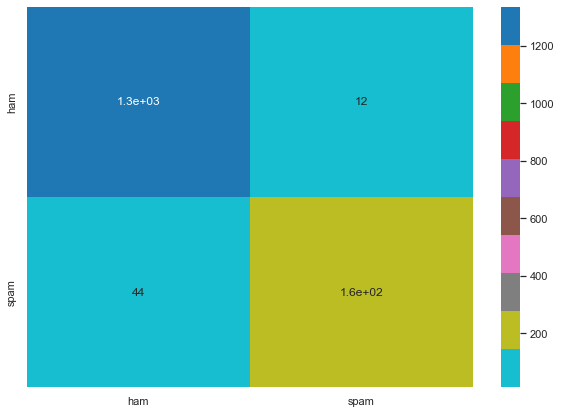

In [83]:
#confusion_matrix
cn=confusion_matrix(y_test,adam_pred)
sns.heatmap(cn,annot=True,cmap='tab10_r',xticklabels=['ham','spam'],yticklabels=['ham','spam'])

In [75]:
#Import the DecisionTreeClassifier from sklean library
from sklearn.tree import DecisionTreeClassifier
#install the library
tree=DecisionTreeClassifier()
#Fit the train data to the model
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [76]:
#DecisionTreeClassifier Testdata prediction
tree_pred=tree.predict(X_test)
tree_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [77]:
#Classification report
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1348
        spam       0.91      0.80      0.85       203

    accuracy                           0.96      1551
   macro avg       0.94      0.90      0.92      1551
weighted avg       0.96      0.96      0.96      1551



In [80]:
#check model accuracy
accuracy=accuracy_score(y_test, tree_pred)
print(accuracy)

0.9632495164410058


<AxesSubplot:>

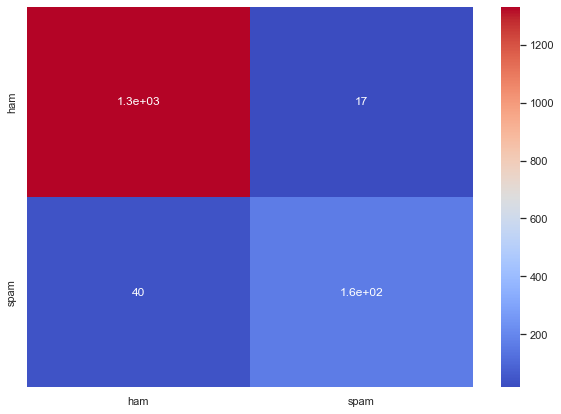

In [85]:
#confusion_matrix
cn=confusion_matrix(y_test,tree_pred)
sns.heatmap(cn,annot=True,cmap='coolwarm',xticklabels=['ham','spam'],yticklabels=['ham','spam'])

***This model is ready for deployment***